<a href="https://www.kaggle.com/code/sunilkumaradapa/elevating-kaggle-performance-with-openfe?scriptVersionId=175047276" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import the libraraies

In [1]:
!pip install openfe 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from openfe import OpenFE, transform,tree_to_formula,TwoStageFeatureSelector
from sklearn.metrics import r2_score
import lightgbm as lgb

# Data

In [3]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

# Automated Feature Engineering using OpenFE
OpenFE, or Open Feature Engineering, is a Python library designed to automate and optimize the feature engineering process in machine learning workflows. It provides a range of tools and techniques for generating, selecting, and transforming features in datasets, aiming to enhance model performance and simplify the data preprocessing pipeline.

**Key features of OpenFE include:**

**Automated Feature Generation:** OpenFE automates the creation of new features from existing ones, utilizing techniques such as mathematical transformations, aggregations, and interactions.

**Feature Selection:** The library offers methods for selecting the most relevant features for model training, reducing dimensionality and improving model interpretability.

**Data Transformation:** OpenFE provides functions for transforming raw data into formats suitable for machine learning algorithms, including handling missing values, encoding categorical variables, and scaling numerical features.

**Customizable Pipelines:** Users can create custom feature engineering pipelines tailored to their specific datasets and modeling tasks, integrating OpenFE's functionalities seamlessly into their workflows.

**Scalability and Efficiency:** OpenFE is designed to handle large datasets efficiently, utilizing parallel processing and optimization techniques to speed up feature engineering tasks.

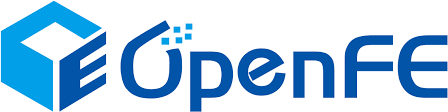
# Doc:[OpenFE DOC](https://openfe-document.readthedocs.io/en/latest/quick_start.html)
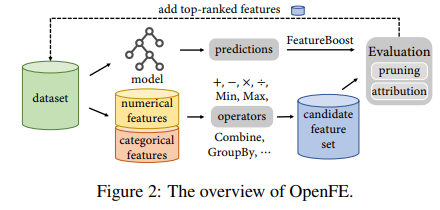

In [4]:
def get_score(train_x, test_x, train_y, test_y):
    train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=1)
    params = {'n_estimators': 1000, 'n_jobs': n_jobs, 'seed': 1}
    gbm = lgb.LGBMRegressor(**params)
    gbm.fit(train_x, train_y, eval_set=[(val_x, val_y)], callbacks=[lgb.early_stopping(50, verbose=False)])
    pred = pd.DataFrame(gbm.predict(test_x), index=test_x.index)
    score = r2_score(test_y, pred)
    return score

In [5]:
if __name__ == '__main__':
    n_jobs = 4
    data = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
    label = data[['FloodProbability']]
    del data['FloodProbability']

    train_x, test_x, train_y, test_y = train_test_split(data, label, test_size=0.2, random_state=1)
    # get baseline score
    score = get_score(train_x, test_x, train_y, test_y)
    print("The R2_score before feature generation is", score)
    # We use the two-stage pruning algorithm of OpenFE to perform Feature Selection
    fs = TwoStageFeatureSelector(n_jobs=n_jobs)
    features = fs.fit(data=train_x, label=train_y)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 21
[LightGBM] [Info] Start training from score 0.504498
The R2_score before feature generation is 0.8383970380156253
The number of candidate features is 21
Start stage I selection.


  0%|          | 0/11 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021239 seconds.
You can set `force_row_wise=true` t

 18%|█▊        | 2/11 [00:30<01:56, 12.96s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1


 36%|███▋      | 4/11 [00:40<00:51,  7.39s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of t

 45%|████▌     | 5/11 [00:48<00:45,  7.62s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1


 55%|█████▍    | 6/11 [00:54<00:35,  7.11s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1


 82%|████████▏ | 9/11 [01:08<00:09,  4.61s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1


100%|██████████| 11/11 [01:17<00:00,  7.08s/it]


The number of remaining candidate features is 21
Start stage II selection.
Finish data processing.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.147664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 21


In [6]:
 # We use the two-stage pruning algorithm of OpenFE to perform Feature Selection
fs = TwoStageFeatureSelector(n_jobs=n_jobs)
features = fs.fit(data=train_x, label=train_y)

# OpenFE gives the ranking of the base features:
print(features)
# Select the top 6 features
new_features = features[:6]
score = get_score(train_x[new_features], test_x[new_features], train_y, test_y)
print("The R2_score after feature selection is", score)

The number of candidate features is 21
Start stage I selection.


  0%|          | 0/11 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059601 seconds.
You can set `force_col_wise=true` t

 18%|█▊        | 2/11 [00:30<01:55, 12.87s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1


 36%|███▋      | 4/11 [00:40<00:52,  7.44s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059397 seconds.
You can set `force_col_wise=true` t

 45%|████▌     | 5/11 [00:48<00:46,  7.69s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

[LightGBM] [Info] Total Bins 17[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1

[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1


 55%|█████▍    | 6/11 [00:54<00:36,  7.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1


 64%|██████▎   | 7/11 [01:05<00:32,  8.24s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1


 82%|████████▏ | 9/11 [01:08<00:09,  4.60s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 1


100%|██████████| 11/11 [01:17<00:00,  7.08s/it]


The number of remaining candidate features is 21
Start stage II selection.
Finish data processing.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 21
['TopographyDrainage', 'DeterioratingInfrastructure', 'DamsQuality', 'RiverManagement', 'MonsoonIntensity', 'PopulationScore', 'Landslides', 'Siltation', 'AgriculturalPractices', 'ClimateChange', 'WetlandLoss', 'Deforestation', 'PoliticalFactors', 'IneffectiveDisasterPreparedness', 'Urbanization', 'Watersheds', 'CoastalVulnerability', 'InadequatePlanning', 'Encroachments', 'DrainageSystems', 'id']
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

In [7]:
new_features

['TopographyDrainage',
 'DeterioratingInfrastructure',
 'DamsQuality',
 'RiverManagement',
 'MonsoonIntensity',
 'PopulationScore']

In [8]:
features

['TopographyDrainage',
 'DeterioratingInfrastructure',
 'DamsQuality',
 'RiverManagement',
 'MonsoonIntensity',
 'PopulationScore',
 'Landslides',
 'Siltation',
 'AgriculturalPractices',
 'ClimateChange',
 'WetlandLoss',
 'Deforestation',
 'PoliticalFactors',
 'IneffectiveDisasterPreparedness',
 'Urbanization',
 'Watersheds',
 'CoastalVulnerability',
 'InadequatePlanning',
 'Encroachments',
 'DrainageSystems',
 'id']

# Note: If you found this notebook helpful or insightful, please consider giving it an upvote. Your support is greatly appreciated and helps to boost its visibility within the Kaggle community. Thank you for your support